# Machine Learning Midterm, Aug Semester, 2020

In this exam, you will demonstrate your understanding of the material from the lectures, tutorials, and problem sets.

Exam submission is on Gradescope. Before you begin the exam, make sure you have created an account at [http://gradescope.com](http://gradescope.com). Then you have to sign up for AT82.03 in Aug 2020. The course signup code is MY3YPW .

For each question, insert your answer directly in this sheet. When complete, export the sheet as a PDF and upload to Gradescope. If you are using puffer.cs.ait.ac.th, in JupyterLab, click on "File" then "Export Notebook As" then select PDF. If you are running Jupyter on your own machine, you may need to install the `nbconvert` package with pip or conda.

Note that you have **2.5 hours** to do the exam. Also note that there are short answer questions that you may be able to answer faster than the coding questions. You might consider answering those questions first to get as much credit as possible!

## Question 1 (10 points)

We have seen that regression problems and binary classification problems have seemingly different cost functions. For regression, we normally use the cost function
$$J(\theta) = \sum_{i=1}^m \left( h_\theta(\mathbf{x}^{(i)}) - y^{(i)} \right)^2,$$
whereas for binary classifiation, we normally use the cost function
$$J(\theta) = \sum_{i=1}^m \left( y^{(i)} \log h_\theta(\mathbf{x}^{(i)}) + (1-y^{(i)})\log(1 - h_\theta(\mathbf{x}^{(i)})) \right). $$

Briefly explain (in English) how these two different cost functions are derived from the same idea or principle.

*Write your answer here.*


ANSWER = The cost function of regression model is based on the calculation of the least squares error. 
On the other hand, the cost function of the binary classification is based on the maximum likelihood(as written above).

They are based on the same principle as least squares error method tries to minimize the difference between the predicted value and the ground truth
and maximum likelihood is a method of estimating the parameters of a probability distribution by maximizing a likelihood function, 
so that under the assumed statistical model the observed data is most probable. 

And if we were to simplify maximum likelihood futher by taking log and make it negative, the result should be the same as the least square error.


## Question 2 (20 points)

Generate a sample of 200 points from a 2D Gaussian with mean $\mu_1 = \begin{bmatrix} 3 \\ 3 \end{bmatrix}$ and covariance $\Sigma_1 = \begin{bmatrix} 4 & 0 \\ 0 & 4 \end{bmatrix}$

Generate a second sample of 200 points from a 2D Gaussian with mean $\mu_2 = \begin{bmatrix} 5 \\ 5 \end{bmatrix}$ and covariance $\Sigma_2 = \begin{bmatrix} 4 & 0 \\ 0 & 4 \end{bmatrix}$.

Assuming the first set of points is class 0 and the second set of points is class 1, split the dataset into 80% training and 20% testing, and plot the
training set and test set in separate plots with different colors for each class below.

(200, 2)
(200, 2)


Text(0.5, 1.0, 'Classification dataset for question 4')

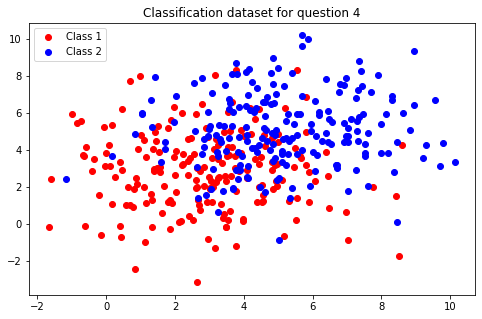

In [13]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
mean1 = [3, 3]
cov1 = [[4, 0], [0, 4]]
x1= np.random.multivariate_normal(mean1,cov1,200)
print(x1.shape)

mean2 = [5, 5]
cov2 = [[4, 0], [0, 4]]
x2= np.random.multivariate_normal(mean2,cov2,200)
print(x2.shape)

#plot
plt.figure(figsize=(8, 5))
plt.plot(x1[:,0], x1[:,1], 'ro', label='Class 1')
plt.plot(x2[:,0], x2[:,1], 'bo', label='Class 2')
# plt.xlim([-3.5,3.5])
plt.legend()
plt.title('Classification dataset for question 4')

In [31]:
# partitioning the data to 80-20 
X1_train = x1[0:160,:]
X1_test = x1[160:,:]
print(X1_train.shape,X1_test.shape)
X2_train = x2[0:160,:]
X2_test = x2[160:,:]
print(X2_train.shape,X2_test.shape)

X_train = np.concatenate((X1_train, X2_train), 0)
y_train = np.concatenate((np.zeros((160,1)), np.ones((160,1))), 0)
X_test = np.concatenate((X1_test, X2_test), 0)
y_test = np.concatenate((np.zeros((40,1)), np.ones((40,1))), 0)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(160, 2) (40, 2)
(160, 2) (40, 2)
(320, 2) (320, 1)
(80, 2) (80, 1)


Text(0.5, 1.0, 'Classification data set test')

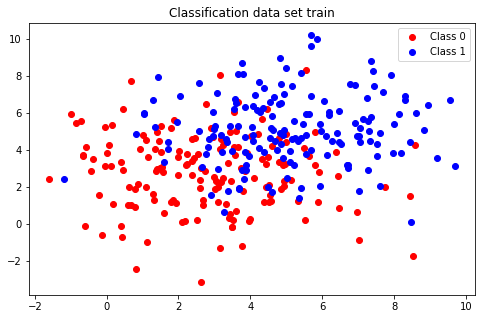

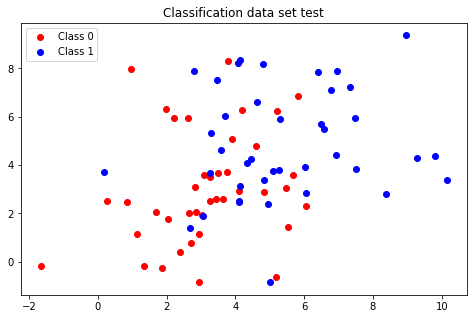

In [43]:
#plot
plt.figure(figsize=(8, 5))
plt.plot(X_train[:160,0], X_train[:160,1], 'ro', label='Class 0')
plt.plot(X_train[160:,0], X_train[160:,1], 'bo', label='Class 1')
plt.legend()
plt.title('Classification data set train')


plt.figure(figsize=(8, 5))
plt.plot(X_test[:40,0], X_test[:40,1], 'ro', label='Class 0')
plt.plot(X_test[40:,0], X_test[40:,1], 'bo', label='Class 1')
plt.legend()
plt.title('Classification data set test')

## Question 3 (20 points)

Build a logistic regression model for the training set in Question 2. Plot the test set with correctly and incorrectly classified
points using different symbols, and show the classification boundary in a plot below. 

In [44]:
# Add dummy
intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1)  #add intercept

print('shapes of X_train, y_train with DUMMY added')
print(X_train.shape,y_train.shape)
print('shapes of X_test, y_test with DUMMY added')
print(X_test.shape,y_test.shape)

shapes of X_train, y_train with DUMMY added
(320, 3) (320, 1)
shapes of X_test, y_test with DUMMY added
(80, 3) (80, 1)


In [51]:
# Initializing Theta
theta_initial = np.zeros(X_train.shape[1])
theta_initial = theta_initial.reshape(-1,1)
# check shape of theta
print("="*30)
print("Shape of theta: ", theta_initial.shape)

# initial theta
print("="*30)
print("Initial theta: ", theta_initial)

Shape of theta:  (3, 1)
Initial theta:  [[0.]
 [0.]
 [0.]]


In [124]:
def predict(X, theta):
    return 1 / (1 + np.exp(- X @ theta))

# def loglike(y, ypred):
#     return sum(y * np.log(ypred) + (1-y) * np.log(1-ypred))[0]
def loglike(y, ypred):
    
    return sum(y * np.log(ypred) + (1-y) * np.log(1-ypred))[0]

def accuracy(y, ypred):
    return sum((ypred >= 0.5) == (y == 1)) / y.size

theta = theta_initial
alpha = 0.001
cost_train = []
cost_test = []
for i in range(0,400):
    ypred_train = predict(X_train, theta)
    loglike_train = loglike(y_train, ypred_train)
    cost_train.append(loglike_train)
    acc_train = accuracy(y_train, ypred_train)
    ypred_test = predict(X_test, theta)
    loglike_test = loglike(y_test, ypred_test)
    acc_test = accuracy(y_test, ypred_test)
    sbest = ''
    if i == 0 or loglike_test > loglike_test_best:
        loglike_test_best = loglike_test
        theta_best = theta
        sbest = '*'
    print('Iter %d: parms (%f, %f, %f), trn like %f acc %f test like %f acc %f %s' %
          (i, theta[0], theta[1], theta[2], loglike_train, acc_train, loglike_test, acc_test, sbest))
    dtheta = X_train.T @ (y_train - ypred_train)
    theta = theta + alpha * dtheta

def plot_line(plot_handle, theta):
    X11 = -2
    X12 = (- theta[0] - theta[1] * X11) / theta[2]
    X21 = 10
    X22 = (- theta[0] - theta[1] * X21) / theta[2]
    plot_handle.plot([X11, X21], [X21, X22], 'k-')

print('Best parameters: (%f, %f, %f)' % (theta_best[0], theta_best[1], theta_best[2]))


Iter 0: parms (0.000000, 0.000000, 0.000000), trn like -221.807098 acc 0.500000 test like -55.451774 acc 0.500000 *
Iter 1: parms (0.000000, 0.179877, 0.185064), trn like -242.831885 acc 0.515625 test like -64.125871 acc 0.512500 
Iter 2: parms (-0.092739, -0.066625, -0.054244), trn like -258.448574 acc 0.500000 test like -64.379347 acc 0.487500 
Iter 3: parms (-0.048774, 0.318583, 0.330831), trn like -326.500899 acc 0.518750 test like -88.492813 acc 0.512500 
Iter 4: parms (-0.172228, -0.048261, -0.030183), trn like -246.081735 acc 0.500000 test like -61.397037 acc 0.500000 
Iter 5: parms (-0.134550, 0.303223, 0.319768), trn like -306.666581 acc 0.521875 test like -83.187986 acc 0.512500 
Iter 6: parms (-0.253322, -0.048943, -0.026955), trn like -248.438594 acc 0.500000 test like -62.036563 acc 0.500000 
Iter 7: parms (-0.210338, 0.323137, 0.342485), trn like -312.644951 acc 0.521875 test like -85.177446 acc 0.512500 
Iter 8: parms (-0.330342, -0.035195, -0.010778), trn like -240.8232

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0.5, 1.0, 'Best logistic regression classifier')

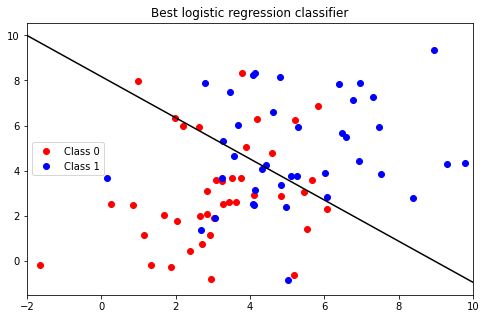

In [128]:

test_idx_0 = (y_test==0).reshape(X_test.shape[0])
test_idx_1 = (y_test==1).reshape(X_test.shape[0])

plt.figure(figsize=(8, 5))
plt.plot(X_test[test_idx_0, 1], X_test[test_idx_0, 2], 'ro', label='Class 0')
plt.plot(X_test[test_idx_1, 1], X_test[test_idx_1, 2], 'bo', label='Class 1')
plot_line(plt, theta_best)
plt.xlim([-2,10])
plt.legend()
plt.title('Best logistic regression classifier')

Best parameters: (-2.970679, 0.334919, 0.396518)


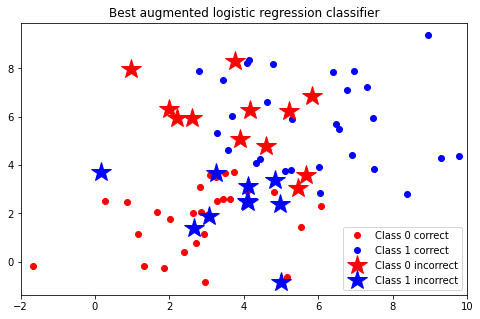

In [129]:

plt.figure(figsize=(8, 5))
y_pred_best = predict(X_test, theta_best)
idx_correct = (y_pred_best < 0.5) == (y_test == 0)
idx_correct_0 = ((y_test == 0) & idx_correct).reshape(80)
idx_correct_1 = ((y_test == 1) & idx_correct).reshape(80)
idx_incorrect_0 = ((y_test == 0) & ~idx_correct).reshape(80)
idx_incorrect_1 = ((y_test == 1) & ~idx_correct).reshape(80)

plt.plot(X_test[idx_correct_0, 1], X_test[idx_correct_0, 2], 'ro', label='Class 0 correct')
plt.plot(X_test[idx_correct_1, 1], X_test[idx_correct_1, 2], 'bo', label='Class 1 correct')
plt.plot(X_test[idx_incorrect_0, 1], X_test[idx_incorrect_0, 2], 'r*', label='Class 0 incorrect', ms=20)
plt.plot(X_test[idx_incorrect_1, 1], X_test[idx_incorrect_1, 2], 'b*', label='Class 1 incorrect', ms=20)
plt.xlim([-2,10])
plt.legend()
plt.title('Best augmented logistic regression classifier')

print('Best parameters: (%f, %f, %f)' % (theta_best[0], theta_best[1], theta_best[2]))


## Question 4 (10 points)

Explain why it is not possible to train a SVM using the techniques we've studied so far in class to classify the data from Question 2. Give a value for $\mu_2$ in Question 2 keeping the other values constant that would make it very likely that the training could be classified using the SVM techniques we studied so far in class.

*Write your answer here*

ANSWER =  It is not possible to train a SVM using the techniques we have studied in class,
as these two data sets over lap each other a lot( there is no clear margin)

mu2 can be taken as [20 20]


However, we may allow some overlapping between the classes. We may try to introduce "c" into the problem where c is the penalty of incorrect training classification. (also a hyperparameter)
In order to find the best pair of Gamma and c(hyperparameters), GridSearch is introduced

## Question 5 (10 points)

Suppose you are building a linear SVM in $\mathbb{R}^2$. The two classes are represented as 'X's and 'O's in the diagram below.

<img src="http://www.cs.ait.ac.th/~mdailey/class/ml/q2.jpg" width="400"></img>

If the training data consisted only of the four examples A, B, C, and D in the diagram above, which would be the support
vectors?

*Place your answer here*


ANSWER = The support vectors of the training data above would be point A and D

## Question 6 (10 points)

In Question 5 (the linear SVM),
if you were told that Lagrange multipliers $\alpha_A = 1.0$ and $\alpha_D = 2.0$, what would $\alpha_B$ and $\alpha_C$ be?

*Place your answer here*


ANSWER = alpha of of B and C would be 0, as they are not the support vectors.

## Question 7 (10 points)

Suppose the optimal linear SVM for Question 5 had $\mathbf{w} = \begin{bmatrix} 1 & 1 \end{bmatrix}^\top$ and $b = -2$.
Find the geometric margin $\gamma^{(i)}$ for $\mathbf{x}^{(i)} = \begin{bmatrix} 2 & 5 \end{bmatrix}^\top$ and $y^{(i)} = 1$. 

*Place your answer here*


In [131]:
y = 1
x = np.array([2,5]).reshape(-1,1)
print(x.shape)
w = np.array([1,1]).reshape(-1,1)
print(w.shape)
b = -2 
geo_marg = y*(w.T@x + b)
# print(geo_marg[0])
print("The geometric margin: ", geo_marg[0][0])

(2, 1)
(2, 1)
The geometric margin:  5


## Question 8 (10 points)

Consider the SVM kernel $K(\mathbf{x},\mathbf{z}) = (\mathbf{x}^\top \mathbf{z})^2$. Explain the similarities and differences between a SVM with this kernel and a logistic regression using a quadratic polynomial transformation (an ordinary logistic regression preceeded by a transformation of the input vector. If they are exactly the same, prove it. If not, clearly explain how they are different.

*Place your answer here*

ANSWER = They are similar but not exactly the same.

where x = (x1,x2)
      y = (y1,y2)

(xTz)^2 = ((x1y1)^2+2(x1y1x2y2)+(x2y2)^2)

phi(x)* phi(z) = 1 +(x1y1)^2+(x2y2)^2+2x1y1 +2x2y2 + 2(x1y1x2y2))

where

phi(x) = [1,x1^2,x2^2,root(2)(x1),root(2)(x2),root(2)(x1x2)]

phi(z) = [1,y1^2,y2^2,root(2)(y1),root(2)(y2),root(2)(y1y2)]

    They are some similar terms which are as follows:
    
    1. (x1y1)^2
    2. 2x1y1x2y2
    3. (x2y2)^2
    
    The terms which are different are as follows:
    
    1. 1
    2. 2x1y1
    3. 2x2y2

Note: see attachment for mathematical proof
    K(x,z) = (xT z)^2 c is taken as 0